# Taş Kağıt Makas Görüntü Sınıflandırma
# Rock Paper Scissors Image Classification

## Giriş

Bu projede derin öğrenme kullanılarak görüntülerden taş, kağıt ve makas hareketlerinin otomatik olarak sınıflandırılması amaçlanmaktadır. Proje, bilgisayarla görme alanında temel bir görüntü sınıflandırma problemi olup, Convolutional Neural Network (CNN) mimarisi kullanılarak çözülmektedir. Amaç, kullanıcıdan alınan bir görüntüyü analiz ederek hangi sınıfa ait olduğunu yüksek doğrulukla tahmin edebilen bir model geliştirmektir. Bu çalışma, görüntü işleme, model eğitimi ve gerçek zamanlı tahmin süreçlerini kapsayan uçtan uca bir bilgisayarla görme uygulamasıdır.



## Veri Hakkında Bilgi

Projede kullanılan veri seti Kaggle üzerinde yer alan Rock Paper Scissors görüntü veri setidir. Veri seti üç sınıftan oluşmaktadır:

Rock (Taş)

Paper (Kağıt)

Scissors (Makas)

Her sınıf farklı el hareketlerini temsil eden çok sayıda renkli görüntü içermektedir. Görseller farklı açılar, ışık koşulları ve arka planlarla çekildiği için modelin genelleme yeteneğini artıracak çeşitlilik sunmaktadır. Veri seti klasör yapısı CNN eğitimine uygun şekilde düzenlenmiştir ve her sınıf ayrı klasörlerde tutulmaktadır.

Bu yapı, supervised learning (denetimli öğrenme) yaklaşımı ile doğrudan eğitim yapılmasına olanak sağlar.

## Workflow (Çalışma Akışı)

Bu projede izlenen adımlar aşağıdaki gibidir:

1 - Veri setinin yüklenmesi ve klasör yapısının incelenmesi

2 - Görsellerin yeniden boyutlandırılması ve normalize edilmesi

3 - Eğitim ve doğrulama veri setlerinin oluşturulması

4 - CNN mimarisinin tasarlanması

5 - Modelin compile edilmesi ve eğitilmesi

6 - Eğitim sürecinin performans grafiklerinin incelenmesi

7 - Eğitilmiş modelin kaydedilmesi

8 - Yeni görüntüler üzerinde tahmin yapılması

9 - Modelin Streamlit uygulaması ile deploy edilmesi

Bu akış sayesinde veri hazırlama aşamasından modelin gerçek dünyada kullanılabilir hale getirilmesine kadar tüm süreç uçtan uca gerçekleştirilmiştir.

In [1]:
from IPython.display import Image, display

In [2]:
display(Image(url='https://media.istockphoto.com/id/1395632555/vector/colorful-hand-icon-set.jpg?s=612x612&w=0&k=20&c=g6r4Oms6euKipRCjlwLx-8MPs1pajjnP4_aK0r6HEeo=', width=700))

### Kütüphaneleri Yüklüyoruz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

###  Kullanılan Kütüphaneler

Bu projede aşağıdaki kütüphaneler kullanılmaktadır:

- **NumPy / Pandas:** Veri işleme ve sayısal işlemler  
- **Matplotlib / Seaborn:** Grafik ve görselleştirme  
- **OpenCV (cv2):** Görüntü okuma ve işleme  
- **TensorFlow / Keras:** Convolutional Neural Network (CNN) modeli oluşturma  
- **Scikit-learn:** Model performans metrikleri ve değerlendirme


### 1 - Veri setinin yüklenmesi ve klasör yapısının incelenmesi

Bu adımda Rock Paper Scissors veri seti yüklenir ve klasör yapısı kontrol edilir.
Veri seti her sınıf için ayrı klasörler içermektedir (rock, paper, scissors).
Bu yapı, CNN modellerinin doğrudan klasör üzerinden veri okuyabilmesini sağlar.

Amaç:
- Veri yolunun doğru olduğundan emin olmak
- Sınıfları kontrol etmek
- Örnek dosyaları görmek


#### Google Drive Bağlama ve Veri Setinin Yüklenmesi

Bu adımda Google Drive Colab ortamına bağlanır ve zip formatındaki veri seti açılır.
Böylece veri setine Colab üzerinden erişilebilir hale gelir.

Amaç:
- Google Drive bağlantısı kurmak
- Zip dosyasını açmak
- Veri klasörünü hazır hale getirmek

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.listdir("/content/drive/MyDrive")


['Untitled.ipynb',
 'Classroom',
 'Colab Notebooks',
 'Rice_Image_Dataset',
 'archive(2).zip',
 'malaria',
 'capstone.zip',
 'GTSRB',
 'X.npy',
 'y.npy',
 'capstone_model.h5',
 'capstone_model.keras',
 '1Amazon Reviews NLP.ipynb',
 'archive(facemaskdataset).zip',
 'face_mask_cnn_model.keras',
 'README.md',
 'archive(rock-paper-scissors).zip']

In [6]:
!unzip "/content/drive/MyDrive/archive(rock-paper-scissors).zip" -d /content/rps_dataset

Archive:  /content/drive/MyDrive/archive(rock-paper-scissors).zip
  inflating: /content/rps_dataset/README_rpc-cv-images.txt  
  inflating: /content/rps_dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: /content/rps_dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: /content/rps_dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: /content/rps_dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: /content/rps_dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: /content/rps_dataset/paper/0cb6cVL8pkfi4wF6.png  
  inflating: /content/rps_dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: /content/rps_dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: /content/rps_dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: /content/rps_dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: /content/rps_dataset/paper/14K62H4KG1hg5qiJ.png  
  inflating: /content/rps_dataset/paper/1Dfw5FRlS4h60JPX.png  
  inflating: /content/rps_dataset/paper/1Frbe8cdOdkciOBg.png  
  inflating: /content/rps_dataset/paper/1Tt9U9SzrOm98X

In [7]:
data_dir = "/content/rps_dataset"

classes = [c for c in os.listdir(data_dir)
           if os.path.isdir(os.path.join(data_dir, c))]

print("Sınıflar:", classes)

for cls in classes:
    class_path = os.path.join(data_dir, cls)
    print(cls, "→", len(os.listdir(class_path)), "görüntü")


Sınıflar: ['paper', 'rps-cv-images', 'rock', 'scissors']
paper → 712 görüntü
rps-cv-images → 4 görüntü
rock → 726 görüntü
scissors → 750 görüntü


In [8]:
classes=['rock','paper','scissors']

In [9]:
for cls in classes:
    class_path = os.path.join(data_dir, cls)
    print(cls, "→", len(os.listdir(class_path)), "görüntü")

rock → 726 görüntü
paper → 712 görüntü
scissors → 750 görüntü


### 2 - Görsellerin yeniden boyutlandırılması ve normalize edilmesi

Bu adımda görüntüler modele uygun hale getirilir.
CNN modelleri sabit boyutlu girişler beklediği için tüm görüntüler yeniden boyutlandırılır.
Ayrıca piksel değerleri 0–255 aralığından 0–1 aralığına normalize edilir.

Bu işlemler:

- Modelin daha stabil öğrenmesini sağlar
- Eğitim sürecini hızlandırır
- Overfitting riskini azaltır

ImageDataGenerator kullanılarak hem normalizasyon hem de eğitim/doğrulama ayrımı yapılır.


In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 3502 images belonging to 4 classes.
Found 874 images belonging to 4 classes.


In [11]:
!rm -r /content/rps_dataset/rps-cv-images

In [12]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


ImageDataGenerator kullanılarak veri otomatik olarak
bölündü, normalize edildi ve yeniden boyutlandırıldı.
Bu sayede manuel veri işleme yapılmadan model eğitime hazır hale geldi.


### Görsel Kontrol

Model eğitmeden önce veri setinden örnek görüntüler incelenir.
Bu adım, görüntülerin doğru sınıflara ait olduğunu ve
ön işleme adımlarının düzgün çalıştığını doğrulamak için yapılır.


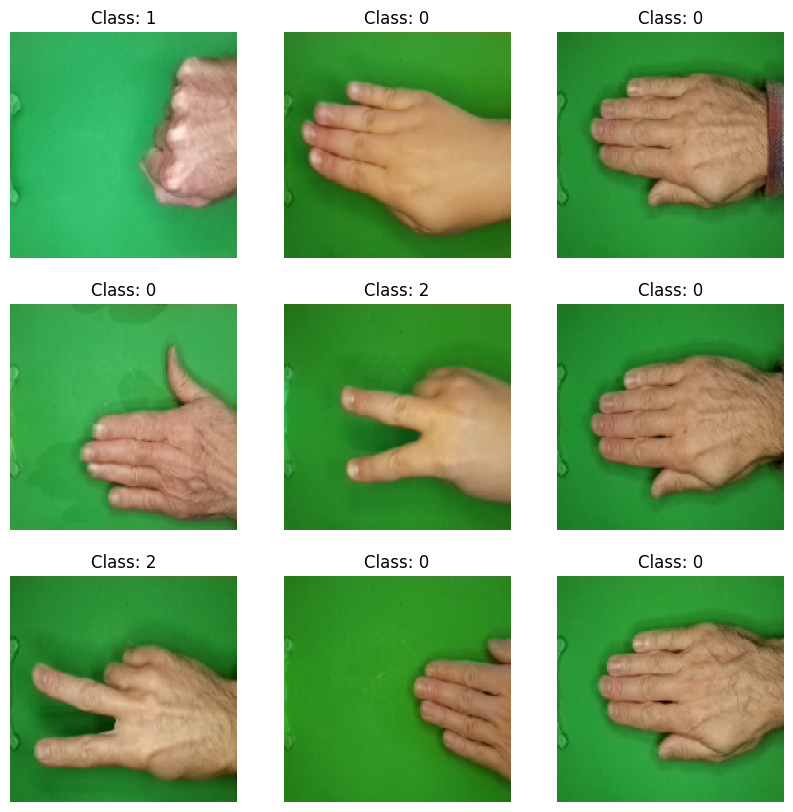

In [13]:
images, labels = next(train_gen)

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i].argmax()}")
    plt.axis('off')

plt.show()

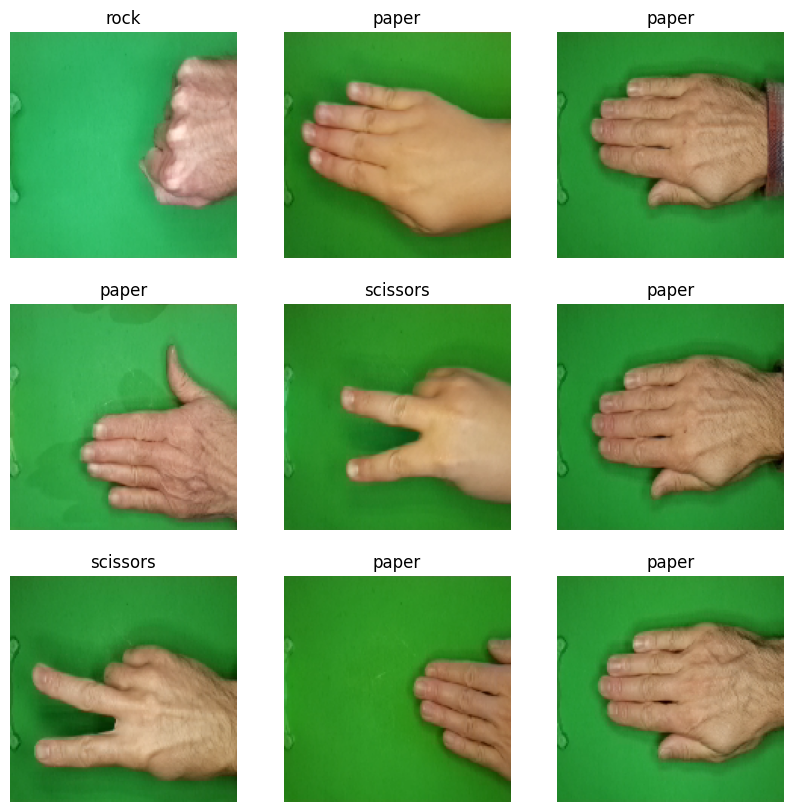

In [14]:
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis('off')

plt.show()

### 3 - Eğitim ve doğrulama veri setlerinin oluşturulması

Bu adımda veri seti eğitim ve doğrulama olarak ikiye ayrılır.
Eğitim verisi modelin öğrenmesi için kullanılırken,
doğrulama verisi modelin genelleme performansını ölçmek için kullanılır.

ImageDataGenerator kullanılarak veri otomatik olarak %80 eğitim
ve %20 doğrulama olacak şekilde bölünmüştür.


In [15]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [16]:
print("Eğitim örnek sayısı:", train_gen.samples)
print("Doğrulama örnek sayısı:", val_gen.samples)

Eğitim örnek sayısı: 1751
Doğrulama örnek sayısı: 437


### 4 - CNN mimarisinin tasarlanması
Bu adımda görüntü sınıflandırma için bir Convolutional Neural Network (CNN)
mimarisi oluşturulur.

CNN modeli:

- Özellik çıkarımı için convolution katmanları
- Boyut azaltma için pooling katmanları
- Sınıflandırma için tam bağlantılı (dense) katmanlar

içermektedir.

Model, rock-paper-scissors sınıflandırma problemi için
3 sınıflı softmax çıkış katmanına sahiptir.


In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Model yaklaşık 4.8 milyon parametre içermektedir.
Bu büyüklük, küçük-orta ölçekli görüntü veri setleri için
uygun bir CNN kapasitesi sunmaktadır.


### Model Mimarisi Görselleştirme

CNN mimarisi grafik olarak görselleştirilmiştir.
Bu grafik modelin katman yapısını ve veri akışını
anlamayı kolaylaştırır.


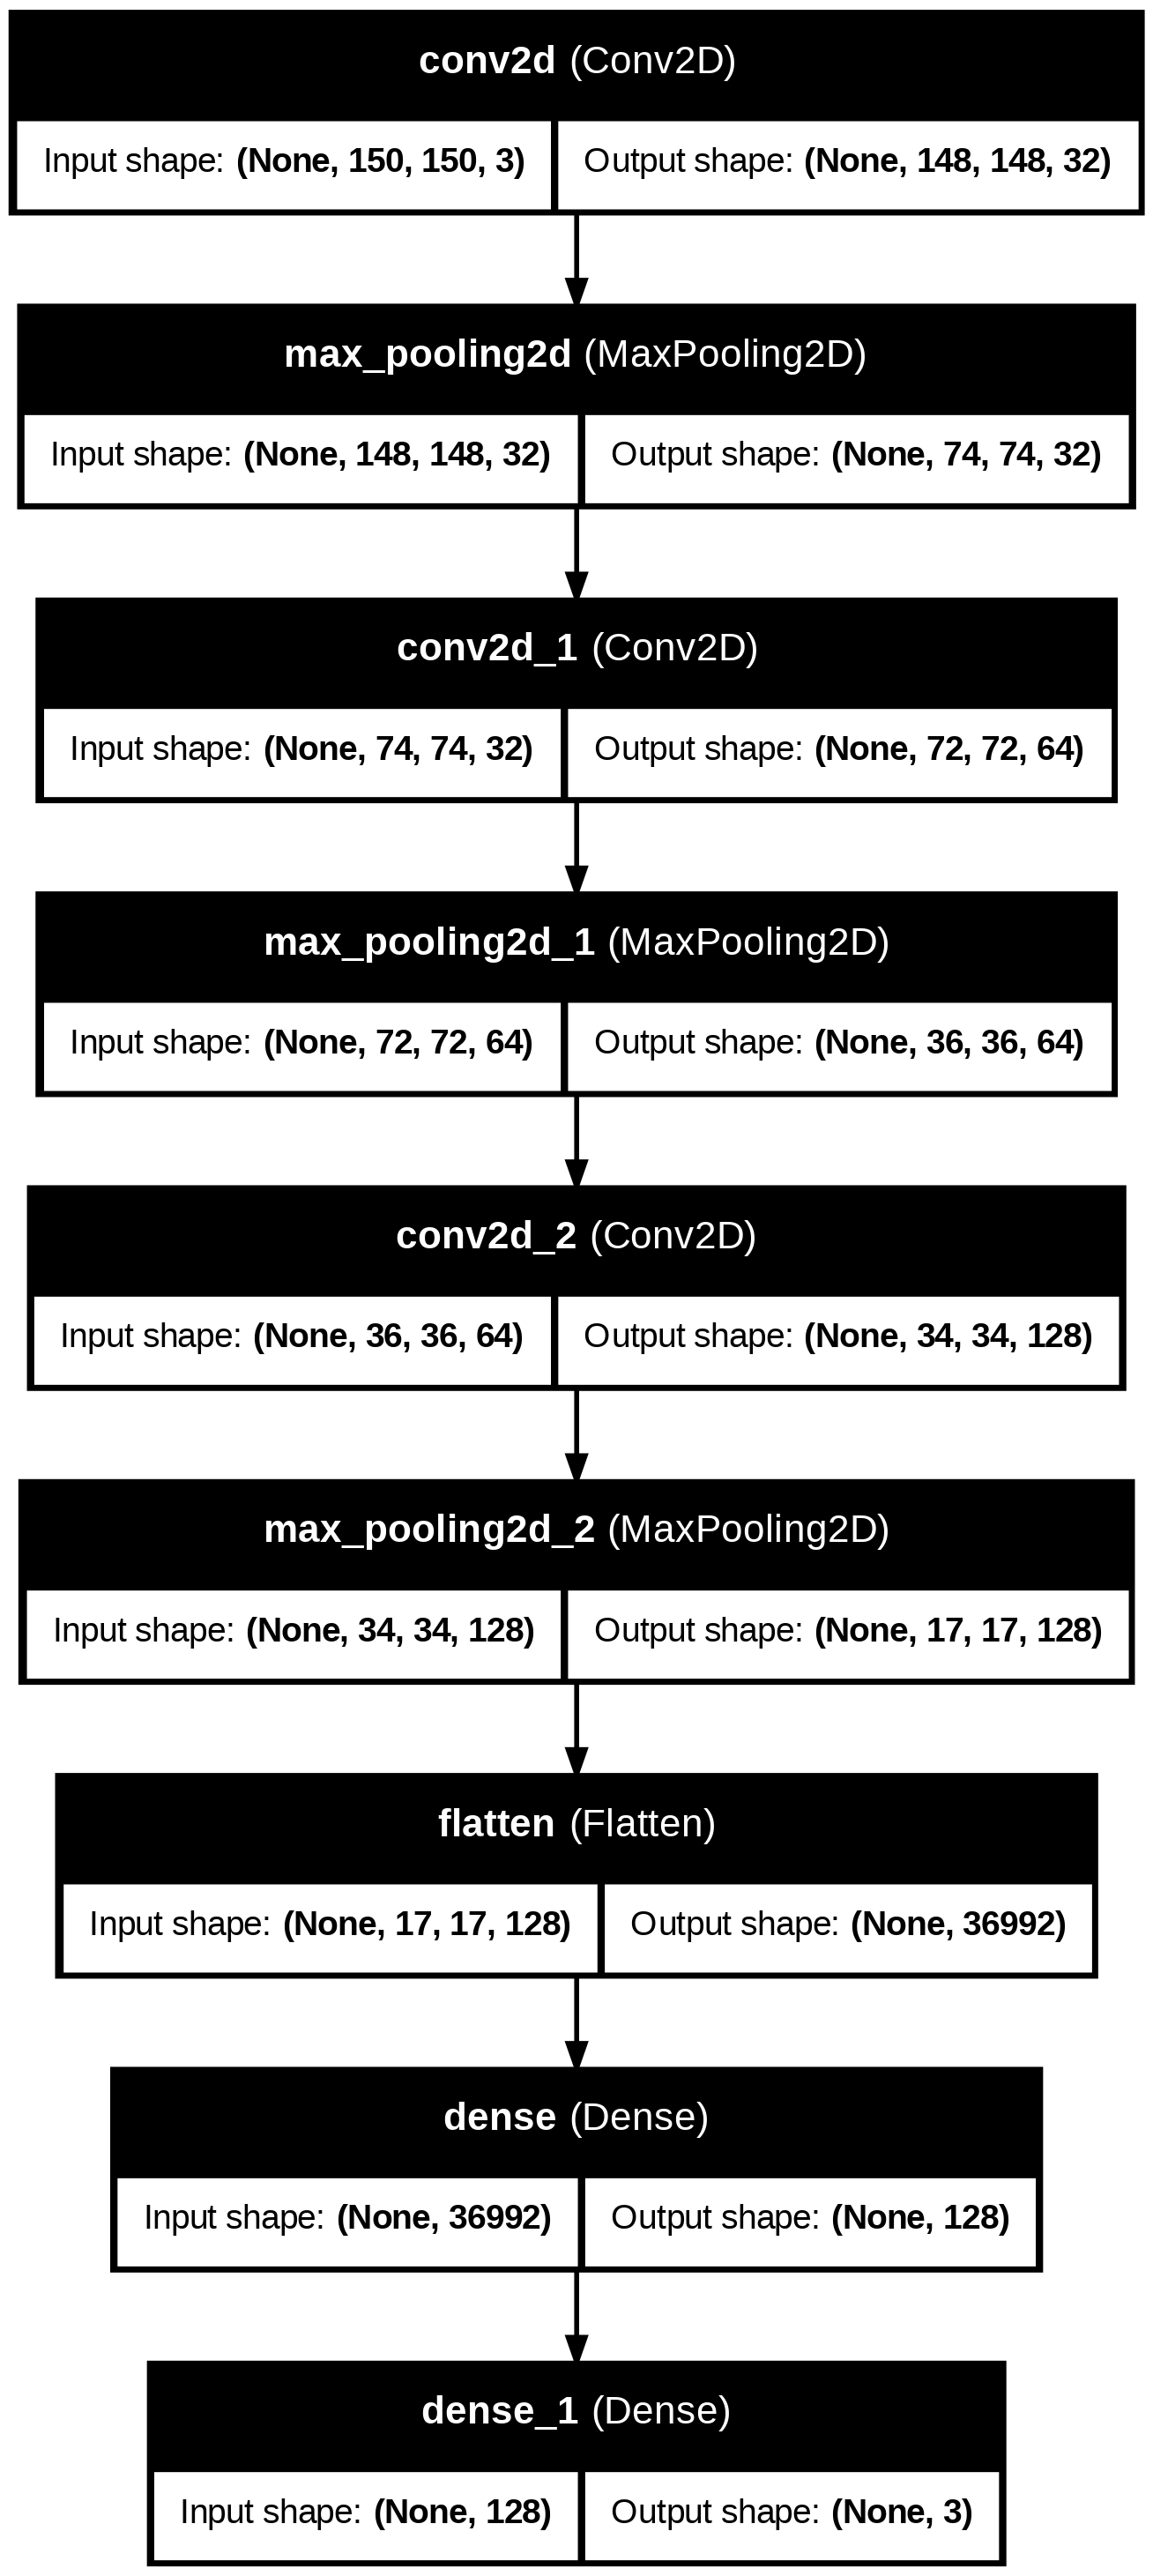

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

### 5 - Modelin compile edilmesi ve eğitilmesi

Model eğitilmeden önce compile edilmelidir.

- optimizer: öğrenme algoritması
- loss: hata fonksiyonu
- metrics: başarı ölçütü

Model categorical crossentropy kayıp fonksiyonu ve
Adam optimizer kullanılarak derlenmiştir.

Ardından model eğitim ve doğrulama verileri ile eğitilmiştir.


In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [21]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.5183 - loss: 1.0143 - val_accuracy: 0.7597 - val_loss: 0.5687
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8360 - loss: 0.4476 - val_accuracy: 0.9062 - val_loss: 0.2451
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9421 - loss: 0.1613 - val_accuracy: 0.9474 - val_loss: 0.1330
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9685 - loss: 0.0926 - val_accuracy: 0.9634 - val_loss: 0.1120
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9897 - loss: 0.0348 - val_accuracy: 0.9542 - val_loss: 0.1263
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9940 - loss: 0.0298 - val_accuracy: 0.9474 - val_loss: 0.1727
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9830 - loss: 0.0408 - val_accuracy: 0.9703 - val_loss: 0.0962
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9965 - loss: 0.0127 - val_accuracy: 0

Model eğitim sonunda %99+ eğitim doğruluğu ve
yaklaşık %97 doğrulama doğruluğu elde etmiştir.

Bu sonuç, modelin görüntü sınıflandırma görevini
başarıyla öğrendiğini ve iyi genelleme yaptığını göstermektedir.


### 6 - Eğitim sürecinin performans grafiklerinin incelenmesi

Modelin eğitim sürecindeki başarı ve hata değerleri grafikle
incelenmiştir.

Bu grafikler modelin öğrenme davranışını,
overfitting olup olmadığını ve performans trendini gösterir.

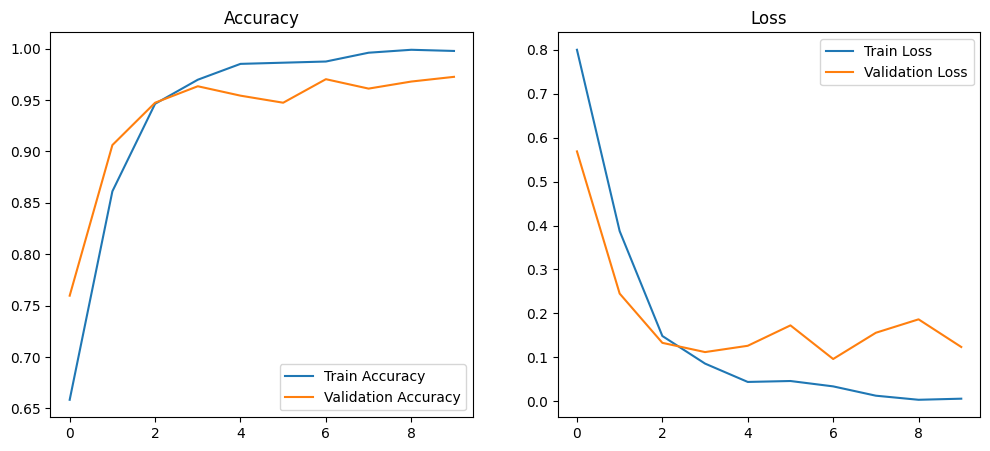

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

Grafikler modelin istikrarlı şekilde öğrendiğini
ve overfitting göstermediğini ortaya koymaktadır.


### 7 - Eğitilmiş modelin kaydedilmesi
Eğitilen CNN modeli daha sonra kullanılabilmesi için
dosya olarak kaydedilmiştir.

Model .h5 formatında saklanmıştır ve bu dosya
Streamlit uygulamasında kullanılacaktır.


In [23]:
model.save("rock_paper_scissors_model.h5")

In [24]:
model.save("rock_paper_scissors_model.keras")

In [25]:
from google.colab import files
files.download("rock_paper_scissors_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 8 - Yeni görüntüler üzerinde tahmin yapılması

Eğitilmiş model kullanılarak yeni bir görüntü üzerinde
tahmin yapılmıştır.

Bu adım modelin gerçek dünyada nasıl çalıştığını
göstermek için önemlidir.

In [28]:
from google.colab import files
uploaded = files.upload()


Saving zkNTynOVx99Kr46m.png to zkNTynOVx99Kr46m.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


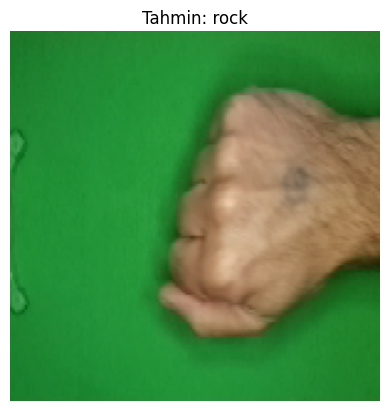

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = ['paper', 'rock', 'scissors']
result = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.title("Tahmin: " + result)
plt.axis('off')
plt.show()


# Sonuç

Bu projede rock-paper-scissors görüntü sınıflandırma problemi için
bir Convolutional Neural Network modeli geliştirilmiştir.

Model yaklaşık %97 doğrulama başarısı elde etmiş ve
yeni görüntüler üzerinde doğru tahminler üretmiştir.

Bu sonuç, CNN mimarisinin küçük görüntü veri setlerinde
yüksek performans gösterebildiğini ortaya koymaktadır.


## Gerçek Hayatta Kullanım Alanları

Bu proje küçük bir oyun veri seti üzerine kurulmuş olsa da,
aynı yaklaşım gerçek dünyada birçok alanda kullanılabilir:

- El hareketi tanıma sistemleri
- Temassız kullanıcı arayüzleri
- Robot kontrolü
- Güvenlik ve gözetim sistemleri
- İşaret dili tanıma uygulamaları

CNN tabanlı görüntü sınıflandırma modelleri,
insan-makine etkileşiminde önemli rol oynamaktadır.


# Rock Paper Scissors - CNN Image Classification

## Project Description
This project builds a Convolutional Neural Network (CNN) to classify
rock, paper, and scissors hand gesture images.

The model is trained on a labeled dataset and achieves high accuracy
on unseen validation images.

## Features
- Image preprocessing and normalization
- CNN model architecture
- Model training and evaluation
- Real image prediction
- Saved model for deployment
- Streamlit demo support

## Technologies Used
- Python
- TensorFlow / Keras
- OpenCV
- NumPy
- Matplotlib
- Streamlit

## Model Performance
Validation accuracy: ~97%

## Real World Applications
- Gesture recognition systems
- Touchless user interfaces
- Robotics control
- Sign language recognition
- Human-computer interaction

## Files
- app.py → Streamlit interface
- rock_paper_scissors_model.h5 → trained model
- notebook.ipynb → full training pipeline

## Demo
HuggingFace Space link:
(you will add after deploy)
